## Representación de Datos

In [15]:
# library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json

 
from funciones_scraping import get_languages


### Coste en tiempo de cada iteración

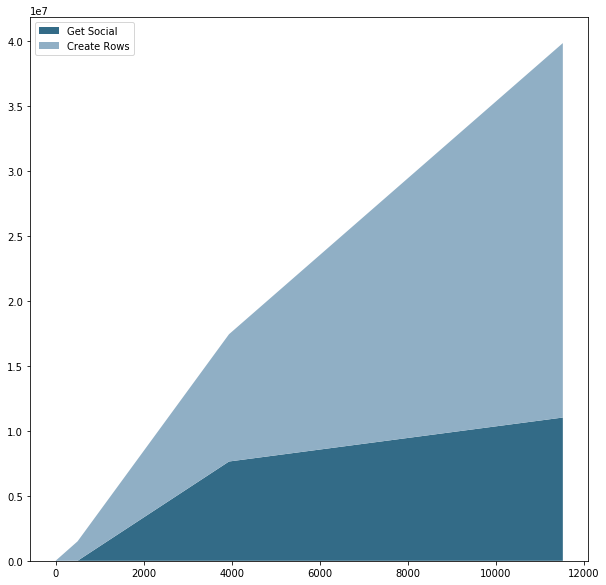

In [28]:
# https://www.canva.com/learn/100-color-combinations/
# https://material.io/design/color/the-color-system.html#tools-for-picking-colors
# https://matplotlib.org/users/colors.html

mpl.rcParams['axes.prop_cycle']

x = [0, 500, 3939, 11520]
y = [[0, 3847,  7642800, 11027477], # get social
     [0, 1494739, 9796075, 28818747]] # create rows
 
# Plot
fig, ax = plt.subplots(figsize=(10,10))
plt.stackplot(x,y, labels=['Get Social','Create Rows'], colors=['#336b87', '#90afc5'])
plt.legend(loc='upper left')
plt.grid(False)
plt.savefig('../output/Coste-tiempo-iteracion.png')
plt.show()


### D3

In [3]:
# languages = [lang for lang in get_languages() if lang in df.columns]
# languages

In [4]:
# {"name": "php", "size": 2},
def create_d3(data): 
    df = data
    idiomas = []
    languages = [lang for lang in get_languages() if lang in df.columns]
    for col in languages: 
        idiomas.append({'name': col, "size": int(df[col].sum())})
    res = {"name": "Lenguajes","children": [{"name": "Lenguajes","children": [{"name": "Lenguajes","children": idiomas}]}]}
    
    return json.dumps(res, ensure_ascii=False)

def save_d3_languages_json(lang_json, filename='../representacion_d3/lenguajes.json'): 
    with open(filename, 'w') as f: 
        f.write(lang_json)

In [7]:
df = pd.read_csv('../output/df-limpio-iter3.csv', index_col=0)
save_d3_languages_json(create_d3(df))

In [6]:
# file:///home/alberto/Escritorio/IH/proyecto-final-IH/representacion_d3/treemap.html

### Grafo de aliados

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
import json
from bs4 import BeautifulSoup
from IPython.display import display

def get_social(user): 
    res = set()
    for link in ['following', 'followers', 'allies']: 
        url = 'https://www.codewars.com/users/{}/{}'.format(user, link)
        html = requests.get(url).content

        soup = BeautifulSoup(html, "lxml")
        res = res.union({e.text for e in soup.select('table a')})
    return res

In [35]:
def create_rows_graph(list_users): 
    res = set()
    for user in list_users: 
        res = res.union()
    return res

In [36]:
create_graph(['albertogcmr'])

{'albertogcmr': {'Girgetto',
  'J4CODE',
  'Raulvv',
  'Tommytrg',
  'VictorIrix',
  'VivianSolide',
  'bel',
  'boyander',
  'epangar',
  'evapanizo',
  'jhoffner',
  'josh35767',
  'mc100s',
  'papuarza',
  'silvio.galli',
  'xFloki',
  'yacineh'}}

In [44]:
df_social = pd.DataFrame({'Name_x': ['hola', 'hello', 'bye'], 'Name_y': ['adios', 'bye', 'hola']})
df_social.head()

,Name_x,Name_y
0,hola,adios
1,hello,bye
2,bye,hola


/home/alberto/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


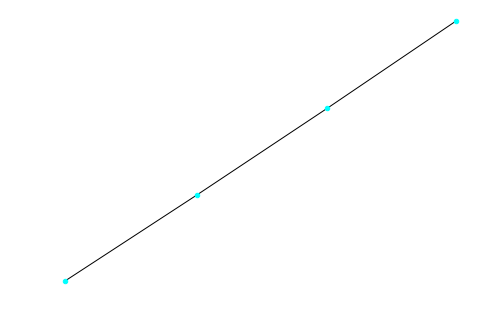

In [45]:
G = nx.from_pandas_edgelist(df=df_social, source='Name_x', target='Name_y')

nx.draw_kamada_kawai(G, node_size=20, node_color='cyan', with_labels=False)